# Customer Churn 

#### Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load the dataset

In [2]:
cm = pd.read_csv("Desktop/datasets/Churn_Modelling.csv")

In [3]:
cm.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
cm.shape

(10000, 14)

#### Explore the data

In [6]:
cm.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [7]:
cm.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
cm.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
column1= cm['CustomerId']
column2=cm['Gender']
print(column1)
print(column2)

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64
0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object


In [10]:
Scolumns=cm[['CustomerId','Gender','CreditScore','Balance']]
Srows = Scolumns.head(10)
print(Srows)

   CustomerId  Gender  CreditScore    Balance
0    15634602  Female          619       0.00
1    15647311  Female          608   83807.86
2    15619304  Female          502  159660.80
3    15701354  Female          699       0.00
4    15737888  Female          850  125510.82
5    15574012    Male          645  113755.78
6    15592531    Male          822       0.00
7    15656148  Female          376  115046.74
8    15792365    Male          501  142051.07
9    15592389    Male          684  134603.88


In [11]:
filtered_data=cm[(cm['EstimatedSalary'] >= 96270.64) & (cm['EstimatedSalary'] <= 101348.88)]
print(filtered_data)

      RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
0             1    15634602    Hargrave          619    France  Female   42   
28           29    15728693  McWilliams          574   Germany  Female   43   
37           38    15729599     Lorenzo          804     Spain    Male   33   
63           64    15751208     Pirozzi          684     Spain    Male   56   
79           80    15803136      Postle          416   Germany  Female   41   
...         ...         ...         ...          ...       ...     ...  ...   
9953       9954    15655952       Burke          550    France    Male   47   
9957       9958    15672237      Oluchi          633    France    Male   25   
9980       9981    15719276        T'ao          741     Spain    Male   35   
9985       9986    15586914      Nepean          659    France    Male   36   
9995       9996    15606229    Obijiaku          771    France    Male   39   

      Tenure    Balance  NumOfProducts  HasCrCard  

#### Visualize the data

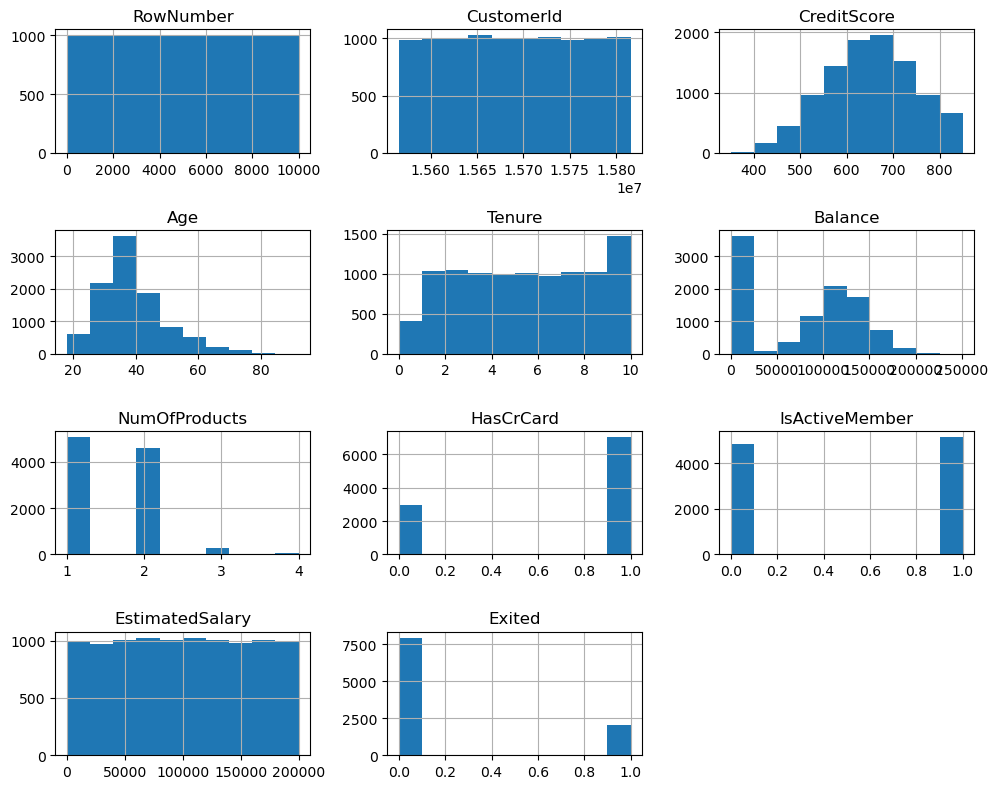

In [12]:
cm.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

C:\Users\pruth\AppData\Local\Temp\ipykernel_10756\2426027195.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_balances = cm[cm['Balance'] >= 83807.86][cm['Gender'] == 'Male']['Balance']
C:\Users\pruth\AppData\Local\Temp\ipykernel_10756\2426027195.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_balances = cm[cm['Balance'] >= 83807.86][cm['Gender'] == 'Female']['Balance']


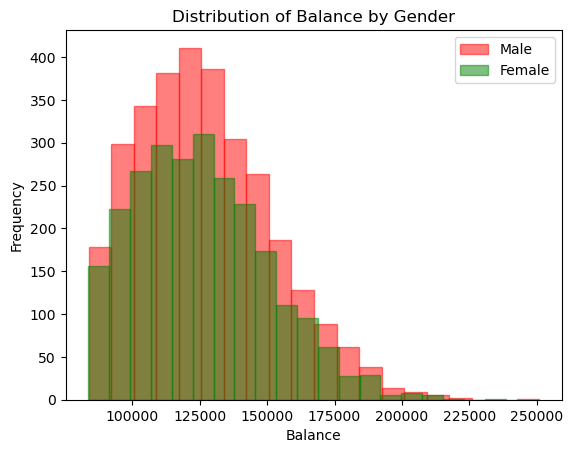

In [13]:
# Filter data based on balance threshold and group by gender
male_balances = cm[cm['Balance'] >= 83807.86][cm['Gender'] == 'Male']['Balance']
female_balances = cm[cm['Balance'] >= 83807.86][cm['Gender'] == 'Female']['Balance']

# Create a histogram for male balances
plt.hist(male_balances, bins=20, color='red', alpha=0.5, label='Male', edgecolor='red',histtype='bar')

# Create a histogram for female balances
plt.hist(female_balances, bins=20, color='green', alpha=0.5, label='Female', edgecolor='green',histtype='bar')

plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance by Gender')
plt.legend()
plt.show()

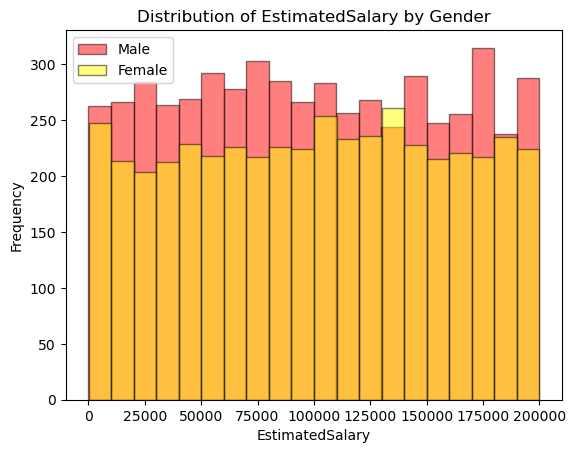

In [14]:
male_salaries = cm[cm['Gender'] == 'Male']['EstimatedSalary']
female_salaries = cm[cm['Gender'] == 'Female']['EstimatedSalary']

# Create histograms for male and female salaries
plt.hist(male_salaries, bins=20, color='red', alpha=0.5, label='Male', edgecolor='black')
plt.hist(female_salaries, bins=20, color='yellow', alpha=0.5, label='Female', edgecolor='black')

plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.title('Distribution of EstimatedSalary by Gender')
plt.legend()
plt.show()

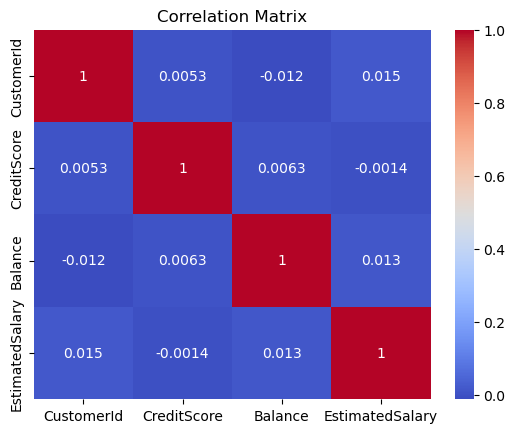

In [15]:
columns = ['CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary']
correlation_matrix = cm[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Model Trainig and Evaluation

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
X = cm.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = cm['Exited']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [19]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [21]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [22]:
# Evaluate Logistic Regression
print("Logistic Regression Performance:")
lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(lr_model, X_test, y_test)
print(f"Accuracy: {lr_accuracy:.2f}, Precision: {lr_precision:.2f}, Recall: {lr_recall:.2f}, F1-Score: {lr_f1:.2f}")

Logistic Regression Performance:
Accuracy: 0.81, Precision: 0.55, Recall: 0.20, F1-Score: 0.29


In [23]:
# Evaluate Gradient Boosting
print("\nGradient Boosting Performance:")
gb_accuracy, gb_precision, gb_recall, gb_f1 = evaluate_model(gb_model, X_test, y_test)
print(f"Accuracy: {gb_accuracy:.2f}, Precision: {gb_precision:.2f}, Recall: {gb_recall:.2f}, F1-Score: {gb_f1:.2f}")



Gradient Boosting Performance:
Accuracy: 0.86, Precision: 0.74, Recall: 0.47, F1-Score: 0.58


In [24]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [26]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_scaled, y)

GradientBoostingClassifier()

In [27]:
new_data = pd.read_csv('Desktop/datasets/Churn_Modelling.csv')  
new_data = new_data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])  

In [28]:
new_data_encoded = pd.get_dummies(new_data, drop_first=True)
missing_cols = set(X_encoded.columns) - set(new_data_encoded.columns)
for col in missing_cols:
    new_data_encoded[col] = 0
new_data_encoded = new_data_encoded[X_encoded.columns]

In [29]:
new_data_scaled = scaler.transform(new_data_encoded)

In [30]:
predictions = gb_model.predict(new_data_scaled)
print("Gradient Boosting Predictions:")
print(predictions)

Gradient Boosting Predictions:
[0 0 1 ... 0 0 0]


In [31]:
lr_predictions = lr_model.predict(new_data_scaled)
rf_predictions = rf_model.predict(new_data_scaled)
print("\nLogistic Regression Predictions:")
print(lr_predictions)
print("\nRandom Forest Predictions:")
print(rf_predictions)


Logistic Regression Predictions:
[0 0 0 ... 0 0 0]

Random Forest Predictions:
[0 0 1 ... 0 0 0]


#### Visualize the Predictions

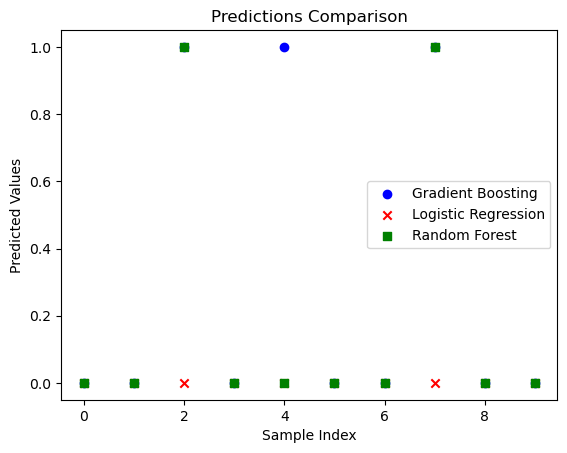

In [32]:
gradient_boosting_predictions = [0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
logistic_regression_predictions = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
random_forest_predictions = [0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

x_values = range(len(gradient_boosting_predictions))

plt.scatter(x_values, gradient_boosting_predictions, label='Gradient Boosting', color='blue', marker='o')
plt.scatter(x_values, logistic_regression_predictions, label='Logistic Regression', color='red', marker='x')
plt.scatter(x_values, random_forest_predictions, label='Random Forest', color='green', marker='s')

plt.xlabel('Sample Index')
plt.ylabel('Predicted Values')
plt.title('Predictions Comparison')
plt.legend()
plt.show()